Model executed 1 scenarios in 0.3 seconds, running at 1527.2 timesteps per second.


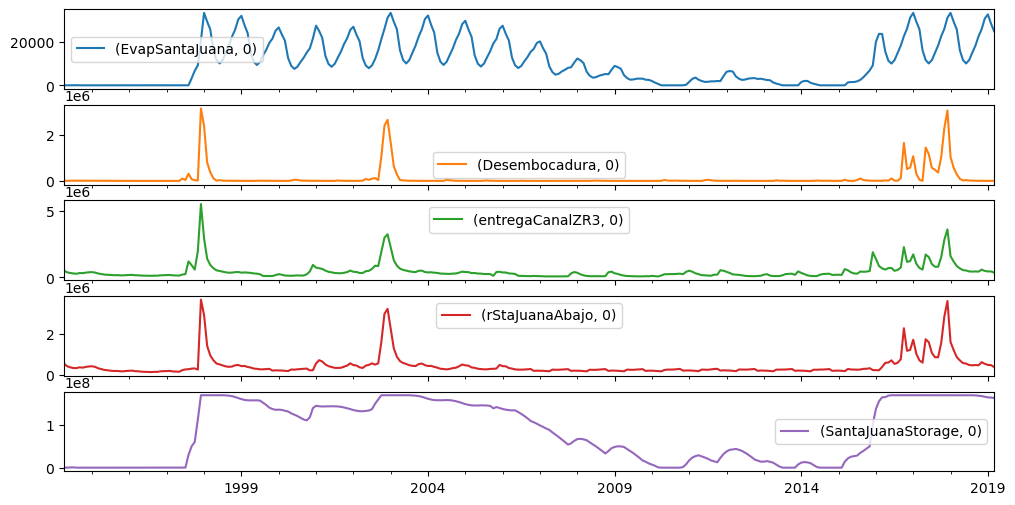

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [1]:
from pywr.core import Model
from pywr.recorders import Recorder
from pywr.recorders._recorders import NodeRecorder
import pandas
import numpy as np
from pywr.notebook import draw_graph
from pywr.notebook import pywr_model_to_d3_json
from pywr.notebook import to_html
from matplotlib import pyplot as plt

if __name__ == "__main__":

    modelo="huasco.json"
    m = Model.load(modelo)
    m.solver.name="glpk-edge"
    stats = m.run()
    print(stats)

    df = m.to_dataframe()
#     print(df.head())
    df.plot(subplots=True, figsize = (12,6))
    plt.show()
    
    plt.figure()
    draw_graph(m,labels = True, attributes = True,width=700,height=700)
    plt.show()


In [3]:
to_html(m,height=800,width=800,labels=True,attributes=True,title='Modelo Cuenca del Río Huasco')